In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import svm, naive_bayes
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold, GridSearchCV, RandomizedSearchCV, cross_val_score
import seaborn as sns
import pickle

read data

In [2]:
data = pd.read_csv('../../Data/cleaned_v4.csv')

In [3]:
data = data[~data['Label'].isin(["Kinh te"])]

# split data

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(data["cc"], data["Label"], test_size= 0.85, random_state= 42)
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((1821,), (1821,), (10321,), (10321,))

In [5]:
Y_train.value_counts()

Giao duc     261
Chinh tri    252
Khoa hoc     242
Suc khoe     241
Giai tri     215
The thao     214
Phap luat    211
Van hoa      185
Name: Label, dtype: int64

# extract feature

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf_vec = TfidfVectorizer()
vector_train = tf_idf_vec.fit_transform(X_train)
vector_train

<1821x26997 sparse matrix of type '<class 'numpy.float64'>'
	with 357115 stored elements in Compressed Sparse Row format>

In [7]:
a = tf_idf_vec.vocabulary_

In [8]:
# import numpy as np

# n = 20  # Number of top scores to retrieve
# top_indices = np.argsort(-vector_train.max(axis=0).toarray()[0])[:50]  # Indices of top N scores
# top_words = [word for word, index in tf_idf_vec.vocabulary_.items() if index in top_indices]
# top_scores = vector_train.max(axis=0).toarray()[0][top_indices]

# for word, score in zip(top_words, top_scores):
#     print(f"Word: {word}, Score: {score}")

In [9]:
dic = {}
x = " ".join(X_train).lower().split()
for i in x:
  if i in dic:
    dic[i] += 1
  else:
    dic[i] = 1
len(dic)

28160

In [10]:
cc = []

In [11]:
for i, v in enumerate(dic):
  if v not in a:
    cc.append(v)

In [12]:
len(cc)

1582

# turning parameters

In [13]:
# param_grid = {'C': [1, 10, 100], 'gamma': [1,0.1,0.01],'kernel': ['rbf', 'poly']}
# # Set up score
# scoring = ['accuracy']
# # Set up the k-fold cross-validation
# kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
# # Define grid search
# grid_search = GridSearchCV(estimator=svm.SVC(), 
#                            param_grid=param_grid, 
#                            scoring=scoring, 
#                            refit='accuracy', 
#                            n_jobs=-1, 
#                            cv=kfold, 
#                            verbose=0)
# # Fit grid search
# grid_result = grid_search.fit(vector_train, Y_train)
# # Print grid search summary
# grid_result.best_params_

In [14]:
# scores = [grid_search.cv_results_['split0_test_accuracy'], grid_search.cv_results_['split1_test_accuracy'], 
#          grid_search.cv_results_['split2_test_accuracy'], grid_search.cv_results_['split3_test_accuracy'], 
#          grid_search.cv_results_['split4_test_accuracy'], grid_search.cv_results_['split5_test_accuracy'], 
#          grid_search.cv_results_['split6_test_accuracy'], grid_search.cv_results_['split7_test_accuracy'], 
#          grid_search.cv_results_['split8_test_accuracy'], grid_search.cv_results_['split9_test_accuracy'], ]

# # plot the accuracy scores for each fold using a box plot
# max_scores = [max(x) for x in scores]
# plt.plot(max_scores)
# plt.xlabel('Validation Set')
# plt.ylabel('Accuracy')
# plt.title('Accuracy of each Validation Set in GridSearchCV')
# plt.show()

# modeling

In [15]:
classifier = svm.SVC(C= 10, gamma= 0.1, kernel= "rbf")
classifier.fit(vector_train, Y_train)

SVC(C=10, gamma=0.1)

# predict

In [16]:
vector_test = tf_idf_vec.transform(X_test)
y_pred = classifier.predict(vector_test)

# report 

In [17]:
# heatconmat(y_pred, Y_test)
print(classification_report(y_pred, Y_test, digits=4))

              precision    recall  f1-score   support

   Chinh tri     0.9281    0.9256    0.9269      1506
    Giai tri     0.8524    0.8707    0.8615      1307
    Giao duc     0.8981    0.9429    0.9199      1383
    Khoa hoc     0.9739    0.9690    0.9714      1387
   Phap luat     0.8861    0.8854    0.8857      1195
    Suc khoe     0.9492    0.9527    0.9510      1354
    The thao     0.9871    0.9871    0.9871      1086
     Van hoa     0.8292    0.7616    0.7940      1103

    accuracy                         0.9146     10321
   macro avg     0.9130    0.9119    0.9122     10321
weighted avg     0.9142    0.9146    0.9142     10321



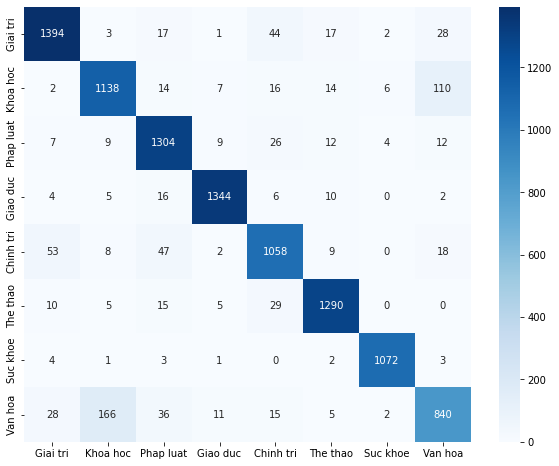

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def heatconmat(y_pred, y_test):
  plt.figure(figsize=(10,8))
  cnf_matrix = confusion_matrix(y_pred, y_test)
  ax = sns.heatmap(cnf_matrix, annot=True, fmt='', cmap='Blues')
  ax.xaxis.set_ticklabels(list(set(y_test)))
  ax.yaxis.set_ticklabels(list(set(y_test)))
  plt.show()
heatconmat(y_pred, Y_test)

# check 

In [19]:
arr_wrong = []
for i, v in enumerate(y_pred):
  if v != np.array(Y_test)[i]:
    arr_wrong.append(i)

In [20]:
arr_true = []
for i, v in enumerate(y_pred):
  if v == np.array(Y_test)[i]:
    arr_true.append(i)

In [21]:
l = pd.Series(sorted([len(x.split()) for x in np.array(X_test)[arr_wrong]]))

In [22]:
t = pd.Series(sorted([len(x.split()) for x in np.array(X_test)[arr_true]]))

In [23]:
len(l), len(l[l.values > 300])

(881, 686)

In [24]:
np.mean(t)

455.2738347457627

In [25]:
np.mean(l)

453.5822928490352

<AxesSubplot:>

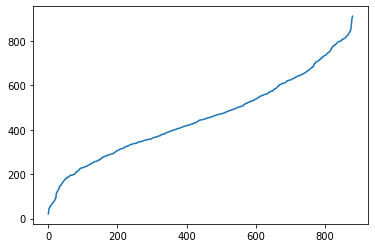

In [26]:
l.plot()

<AxesSubplot:>

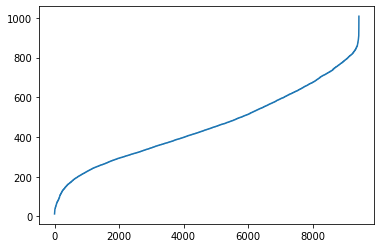

In [27]:
t.plot()

In [28]:
np.array(X_test)[arr_wrong][2]

'Cán_bộ Công_an quận 12 ( TPHCM ) hướng_dẫn người dân đăng_ký tài_khoản Dịch_vụ công trực_tuyến Ảnh : NGÔ BÌNH Dự_thảo Luật Căn_cước công_dân ( sửa_đổi ) có một_số điểm mới so với Luật Căn_cước công_dân năm 2014 . Mở_rộng đối_tượng áp_dụng Dự_thảo Luật Căn_cước công_dân ( sửa_đổi ) - gọi tắt là Dự_thảo luật - mở_rộng đối_tượng áp_dụng so với Luật Căn_cước công_dân năm 2014 . Ngoài công_dân Việt_Nam , cơ_quan , tổ_chức , cá_nhân có liên_quan , Dự_thảo luật còn áp_dụng đối_với người gốc Việt_Nam ( là người không có quốc_tịch đang sinh_sống tại Việt_Nam ) để cấp giấy chứng_nhận căn_cước và số định_danh cho đối_tượng này . Việc bổ_sung nội_dung cấp giấy chứng_nhận căn_cước và số định_danh nhằm quản_lý được toàn_bộ công_dân và người gốc Việt_Nam đang sinh_sống tại địa_phương ; tạo thuận_lợi cho công_tác hoạch_định chính_sách phát_triển xã_hội ; bảo_đảm an_ninh , trật_tự , an_toàn xã_hội . Sửa_đổi , bổ_sung một_số từ_ngữ để giải_thích các khái_niệm Điều 3 Dự_thảo luật đã sửa_đổi , bổ_sung mộ

In [29]:
np.array(y_pred)[arr_wrong][2]

'Chinh tri'

In [30]:
np.array(Y_test)[arr_wrong][2]

'Phap luat'

In [31]:
check = pd.DataFrame({"content": np.array(X_test)[arr_wrong], "predicted": np.array(y_pred)[arr_wrong], "true label": np.array(Y_test)[arr_wrong]})

In [32]:
check['lennn'] = check['content'].apply(lambda x: len(x.split()))

In [33]:
check

,content,predicted,true label,lennn
0,Nida Patcharaveerapong qua_đời vì ngã từ thuyề...,Phap luat,Giai tri,574
1,Trận_Talas nổ ra vào năm 751 giữa triều_đại Hồ...,Khoa hoc,Giao duc,386
2,Cán_bộ Công_an quận 12 ( TPHCM ) hướng_dẫn ngư...,Chinh tri,Phap luat,733
3,NSƯT Trần_Lực từng chia_sẻ với phóng_viên Lao_...,Giai tri,Van hoa,781
4,"Sáng 20 / 3 , phát_biểu tại phiên chất_vấn Chá...",Phap luat,Chinh tri,577
...,...,...,...,...
876,Huấn_luyện chiến_sĩ mới phải bảo_đảm toàn_diện...,Phap luat,Giao duc,723
877,Trận chung_kết lượt về AFF Cup 2022 giữa Thái_...,The thao,Giai tri,490
878,Sự_việc khá hy_hữu được một thực_khách ghi lại...,Giao duc,Phap luat,147
879,"23h đêm 28 / 3 , ông Đặng_Thanh_Phong , Chi_cụ...",Giao duc,Suc khoe,460


In [34]:
len(check)

881

In [35]:
data[data["Content_cleaned_v2"] == np.array(X_test)[arr_wrong][4]].iloc[0].Link

IndexError: single positional indexer is out-of-bounds